In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 999)
%matplotlib inline

df_2012 = pd.read_csv('df_2012.csv')  
df_2012 = df_2012.set_index('fips')
df_2016 = pd.read_csv('df_2016.csv') 
df_2016 = df_2016.set_index('fips')

In [2]:
df_2012.head(2)

state_abbreviation     county_name  diff_2012  2010_population  \
fips                                                                  
1001                 AL  Autauga County  -0.460580            54571   
1003                 AL  Baldwin County  -0.558232           182265   

      land_area  population  perc_female  perc_u5  perc_o18  perc_o65  \
fips                                                                    
1001     594.44       53944         51.5      6.6      72.7      11.7   
1003    1589.78      179523         51.2      6.2      76.8      16.7   

      perc_2races  perc_white  perc_black  perc_native  perc_asian  perc_ap  \
fips                                                                          
1001          1.5        78.9        18.1          0.2         0.7      0.0   
1003          1.4        86.4         9.4          0.6         0.7      0.0   

      perc_hisp  perc_white_not_hisp  perc_vets  perc_foreign  housing_units  \
fips                                                                           
1001        2.4                 77.2      15.41       1.98910          21859   
1003        4.1                 83.8      14.72       3.74938         102978   

      perc_oo  median_oo_value  monthly_costs_m  monthly_costs_nm  \
fips                                                                
1001     77.7           137500             1238             343.0   
1003     76.2           175700             1386             372.0   

      median_rent  households  avg_hh_size  perc_1yr_res  perc_f_lang  \
fips                                                                    
1001          832       19998         2.68          84.8          3.8   
1003          863       70757         2.50          83.3          5.4   

      perc_hs  perc_bc  perc_emp  perc_f_emp_2065  num_nonemployers  \
fips                                                                  
1001     86.5     21.6      65.2             70.2             64316   
1003     87.9     27.2      60.8             68.9             64316   

      man_value_1k  wholesale_value_1k  retail_value_1k  hc_value_1k  \
fips                                                                   
1001   124809759.0          75844516.0       58564965.0   26039632.0   
1003   124809759.0          75844516.0       58564965.0   26039632.0   

      food_value_1k  median_income  per_cap_income  perc_pov  \
fips                                                           
1001      7576462.0          53899           25035      10.9   
1003      7576462.0          51321           27217      12.5   

      num_establishments  num_employees  annual_payroll  vet_num_firms  \
fips                                                                     
1001               835.0        10290.0        276674.0          285.0   
1003              4624.0        51386.0       1516145.0         2364.0   

      fem_num_firms  min_num_firms  
fips                                
1001         1093.0          616.0  
1003         6505.0         2130.0

In [3]:
df_2016.head(2)

state_abbreviation     county_name  diff_2016  2010_population  \
fips                                                                  
1001                 AL  Autauga County  -0.494789            54571   
1003                 AL  Baldwin County  -0.577862           182265   

      land_area  population  perc_female  perc_u5  perc_o18  perc_o65  \
fips                                                                    
1001     594.44     55221.0         51.6      5.9      74.6      13.5   
1003    1589.78    195121.0         51.2      5.4      77.6      18.1   

      perc_2races  perc_white  perc_black  perc_native  perc_asian  perc_ap  \
fips                                                                          
1001          1.6        77.4        18.7          0.4         1.0      0.0   
1003          1.7        86.4         9.6          0.6         0.7      0.0   

      perc_hisp  perc_white_not_hisp  perc_vets  perc_foreign  housing_units  \
fips                                                                           
1001        2.6                 75.8       13.5      1.559189          22582   
1003        4.5                 83.1       13.0      3.527042         106422   

      perc_oo  median_oo_value  monthly_costs_m  monthly_costs_nm  \
fips                                                                
1001     73.9         141300.0           1180.0             354.0   
1003     71.5         169300.0           1316.0             365.0   

      median_rent  households  avg_hh_size  perc_1yr_res  perc_f_lang  \
fips                                                                    
1001        883.0       20396         2.68          84.6          3.3   
1003        879.0       74104         2.60          85.4          6.0   

      perc_hs  perc_bc  perc_emp  perc_f_emp_2065  num_nonemployers  \
fips                                                                  
1001     87.2     23.2      61.7             68.8             64316   
1003     89.5     29.0      59.6             68.9             64316   

      man_value_1k  wholesale_value_1k  retail_value_1k  hc_value_1k  \
fips                                                                   
1001   124809759.0          75844516.0       58564965.0   26039632.0   
1003   124809759.0          75844516.0       58564965.0   26039632.0   

      food_value_1k  median_income  per_cap_income  perc_pov  \
fips                                                           
1001      7576462.0        51281.0           24974      12.9   
1003      7576462.0        50254.0           27317      13.4   

      num_establishments  num_employees  annual_payroll  vet_num_firms  \
fips                                                                     
1001               844.0        10454.0        321433.0          285.0   
1003              5127.0        58868.0       1887256.0         2364.0   

      fem_num_firms  min_num_firms  
fips                                
1001         1093.0          616.0  
1003         6505.0         2130.0

In [4]:
df_2012.describe()

diff_2012  2010_population     land_area    population  perc_female  \
count  3111.000000     3.111000e+03   3111.000000  3.111000e+03  3111.000000   
mean     -0.213239     9.901452e+04    951.190389  9.832314e+04    50.072999   
std       0.294904     3.143772e+05   1303.340446  3.123850e+05     2.296058   
min      -0.924138     8.200000e+01      2.000000  6.200000e+01    24.200000   
25%      -0.425594     1.130900e+04    430.115000  1.135850e+04    49.600000   
50%      -0.238217     2.607600e+04    610.930000  2.604600e+04    50.500000   
75%      -0.032416     6.709650e+04    914.495000  6.685900e+04    51.200000   
max       0.842394     9.818664e+06  20056.940000  9.787747e+06    56.900000   

           perc_u5     perc_o18     perc_o65  perc_2races   perc_white  \
count  3111.000000  3111.000000  3111.000000  3111.000000  3111.000000   
mean      6.210318    76.517968    15.796111     1.893700    84.196143   
std       1.238254     3.363693     4.177042     1.872711    16.175937   
min       0.000000    59.100000     0.000000     0.000000    10.900000   
25%       5.500000    74.800000    13.000000     1.000000    77.650000   
50%       6.100000    76.500000    15.400000     1.500000    90.600000   
75%       6.800000    78.500000    18.100000     2.200000    95.900000   
max      12.800000   100.000000    42.200000    28.300000   100.000000   

        perc_black  perc_native   perc_asian      perc_ap    perc_hisp  \
count  3111.000000  3111.000000  3111.000000  3111.000000  3111.000000   
mean      9.027837     1.561234     1.123079     0.026358     8.106493   
std      14.580009     6.163328     2.368475     0.269642    13.082186   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.500000     0.100000     0.200000     0.000000     1.500000   
50%       2.100000     0.300000     0.500000     0.000000     3.200000   
75%      10.300000     0.800000     1.100000     0.000000     8.000000   
max      85.700000    86.400000    44.500000     8.300000    98.400000   

       perc_white_not_hisp    perc_vets  perc_foreign  housing_units  \
count          3111.000000  3111.000000   3111.000000   3.111000e+03   
mean             78.752395    11.236178      4.405751   4.201989e+04   
std              19.462241     2.824460      5.452939   1.227921e+05   
min               1.300000     0.000000      0.000000   7.100000e+01   
25%              67.650000     9.480000      1.218028   5.513000e+03   
50%              86.000000    11.060000      2.421845   1.229800e+04   
75%              94.200000    12.690000      5.423633   3.074600e+04   
max             100.000000    27.790000     51.192681   3.437584e+06   

           perc_oo  median_oo_value  monthly_costs_m  monthly_costs_nm  \
count  3111.000000      3111.000000      3111.000000       3111.000000   
mean     73.131790    132657.152041      1160.567663        381.632915   
std       7.707524     85082.425665       365.553847        102.525327   
min      20.100000     33300.000000         0.000000          0.000000   
25%      69.400000     81600.000000       927.500000        320.000000   
50%      74.300000    107200.000000      1063.000000        364.000000   
75%      78.400000    154050.000000      1266.000000        414.000000   
max      93.700000    993900.000000      3455.000000       1000.000000   

       median_rent    households  avg_hh_size  perc_1yr_res  perc_f_lang  \
count  3111.000000  3.111000e+03  3111.000000   3111.000000  3111.000000   
mean    649.798457  3.680581e+04     2.515535     86.183799     8.989425   
std     182.460328  1.107705e+05     0.238140      4.579858    11.269182   
min     277.000000  2.700000e+01     1.710000     49.000000     0.000000   
25%     533.000000  4.316000e+03     2.370000     83.800000     2.800000   
50%     604.000000  9.943000e+03     2.500000     86.600000     4.900000   
75%     714.000000  2.576550e+04     2.630000     89.200000     9.900000   
max    1882.000000  3.218518e+

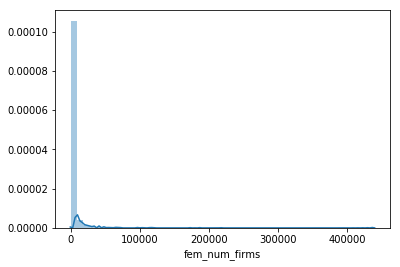

In [2]:
sns.distplot(df_2012['fem_num_firms']);

Skewness: 0.479841
Kurtosis: 0.120025


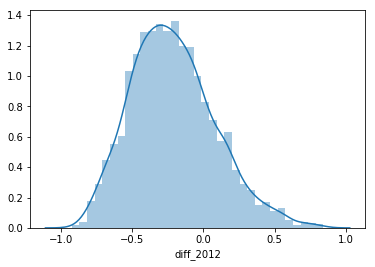

In [5]:
sns.distplot(df_2012['diff_2012']);
print("Skewness: %f" % df_2012['diff_2012'].skew())
print("Kurtosis: %f" % df_2012['diff_2012'].kurt())

In [6]:
df_2016.describe()

diff_2016  2010_population     land_area    population  perc_female  \
count  3111.000000     3.111000e+03   3111.000000  3.111000e+03  3111.000000   
mean     -0.319436     9.901452e+04    951.190389  1.015003e+05    49.985310   
std       0.308229     3.143772e+05   1303.340446  3.245016e+05     2.358685   
min      -0.916364     8.200000e+01      2.000000  1.170000e+02    26.800000   
25%      -0.546912     1.130900e+04    430.115000  1.120500e+04    49.500000   
50%      -0.382228     2.607600e+04    610.930000  2.601200e+04    50.500000   
75%      -0.149127     6.709650e+04    914.495000  6.795050e+04    51.100000   
max       0.887245     9.818664e+06  20056.940000  1.003839e+07    59.400000   

           perc_u5     perc_o18     perc_o65  perc_2races   perc_white  \
count  3111.000000  3111.000000  3111.000000  3111.000000  3111.000000   
mean      5.929090    77.290260    17.195468     2.171231    83.856959   
std       1.222148     3.385602     4.369361     1.849955    16.156379   
min       0.000000    59.700000     3.300000     0.000000    10.200000   
25%       5.200000    75.500000    14.400000     1.200000    77.550000   
50%       5.900000    77.300000    16.800000     1.800000    90.200000   
75%       6.500000    79.300000    19.600000     2.600000    95.500000   
max      14.800000    94.900000    50.900000    28.600000   100.000000   

        perc_black  perc_native   perc_asian      perc_ap    perc_hisp  \
count  3111.000000  3111.000000  3111.000000  3111.000000  3111.000000   
mean      9.079010     1.585953     1.227451     0.075506     8.869174   
std      14.508525     6.197211     2.506009     0.417747    13.552271   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.600000     0.200000     0.200000     0.000000     1.900000   
50%       2.200000     0.300000     0.500000     0.000000     3.700000   
75%      10.500000     0.800000     1.200000     0.100000     9.050000   
max      85.900000    84.900000    42.600000    12.900000    98.700000   

       perc_white_not_hisp    perc_vets  perc_foreign  housing_units  \
count          3111.000000  3111.000000   3111.000000   3.111000e+03   
mean             77.581292     9.842912      4.592006   4.276435e+04   
std              19.623666     2.679930      5.603053   1.249007e+05   
min               0.900000     0.000000      0.000000   7.300000e+01   
25%              65.900000     8.300000      1.281049   5.535500e+03   
50%              84.800000     9.600000      2.564781   1.246800e+04   
75%              93.400000    11.100000      5.650601   3.080850e+04   
max              99.800000    26.900000     51.653706   3.476718e+06   

           perc_oo  median_oo_value  monthly_costs_m  monthly_costs_nm  \
count  3111.000000      3111.000000      3111.000000       3111.000000   
mean     71.517101    133024.970168      1154.148423        398.446572   
std       8.010714     77831.202033       323.830570        109.528925   
min      19.000000     32300.000000        -0.000000        175.000000   
25%      67.600000     86250.000000       953.000000        334.000000   
50%      72.800000    111500.000000      1072.000000        379.000000   
75%      76.950000    155050.000000      1249.000000        433.500000   
max      92.600000    902500.000000      3289.000000       1362.000000   

       median_rent    households  avg_hh_size  perc_1yr_res  perc_f_lang  \
count  3111.000000  3.111000e+03  3111.000000   3111.000000  3111.000000   
mean    698.052008  3.750317e+04     2.526567     86.474799     9.240951   
std     189.721905  1.133557e+05     0.248331      4.361882    11.529090   
min     275.000000  4.500000e+01     1.830000     48.400000     0.000000   
25%     578.000000  4.310500e+03     2.370000     84.200000     2.800000   
50%     651.000000  9.939000e+03     2.500000     87.000000     5.000000   
75%     769.500000  2.595250e+04     2.640000     89.300000    10.400000   
max    1827.000000  3.263069e+

Skewness: 0.896549
Kurtosis: 0.522459


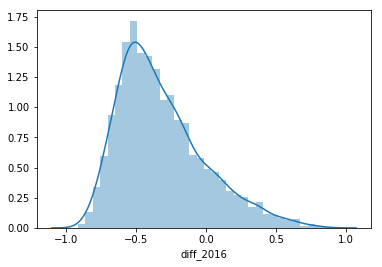

In [7]:
sns.distplot(df_2016['diff_2016']);
print("Skewness: %f" % df_2016['diff_2016'].skew())
print("Kurtosis: %f" % df_2016['diff_2016'].kurt())

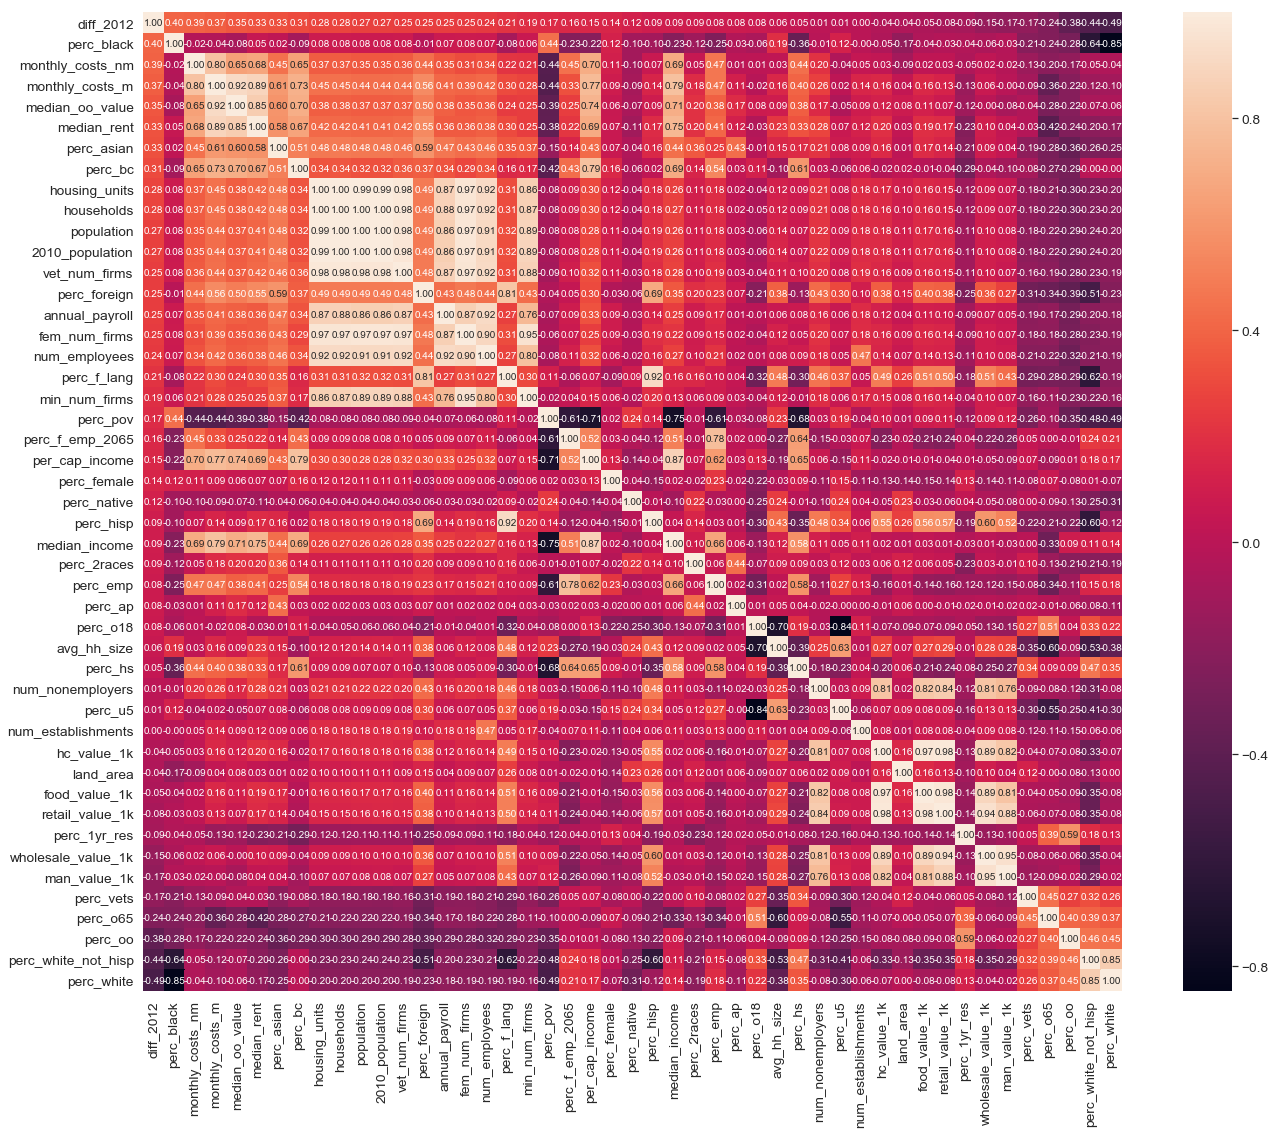

In [8]:
#correlation matrix
corrmat = df_2012.corr()
k = 50 #number of variables for heatmap
cols = corrmat.nlargest(k, 'diff_2012')['diff_2012'].index
cm = np.corrcoef(df_2012[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(22, 18))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

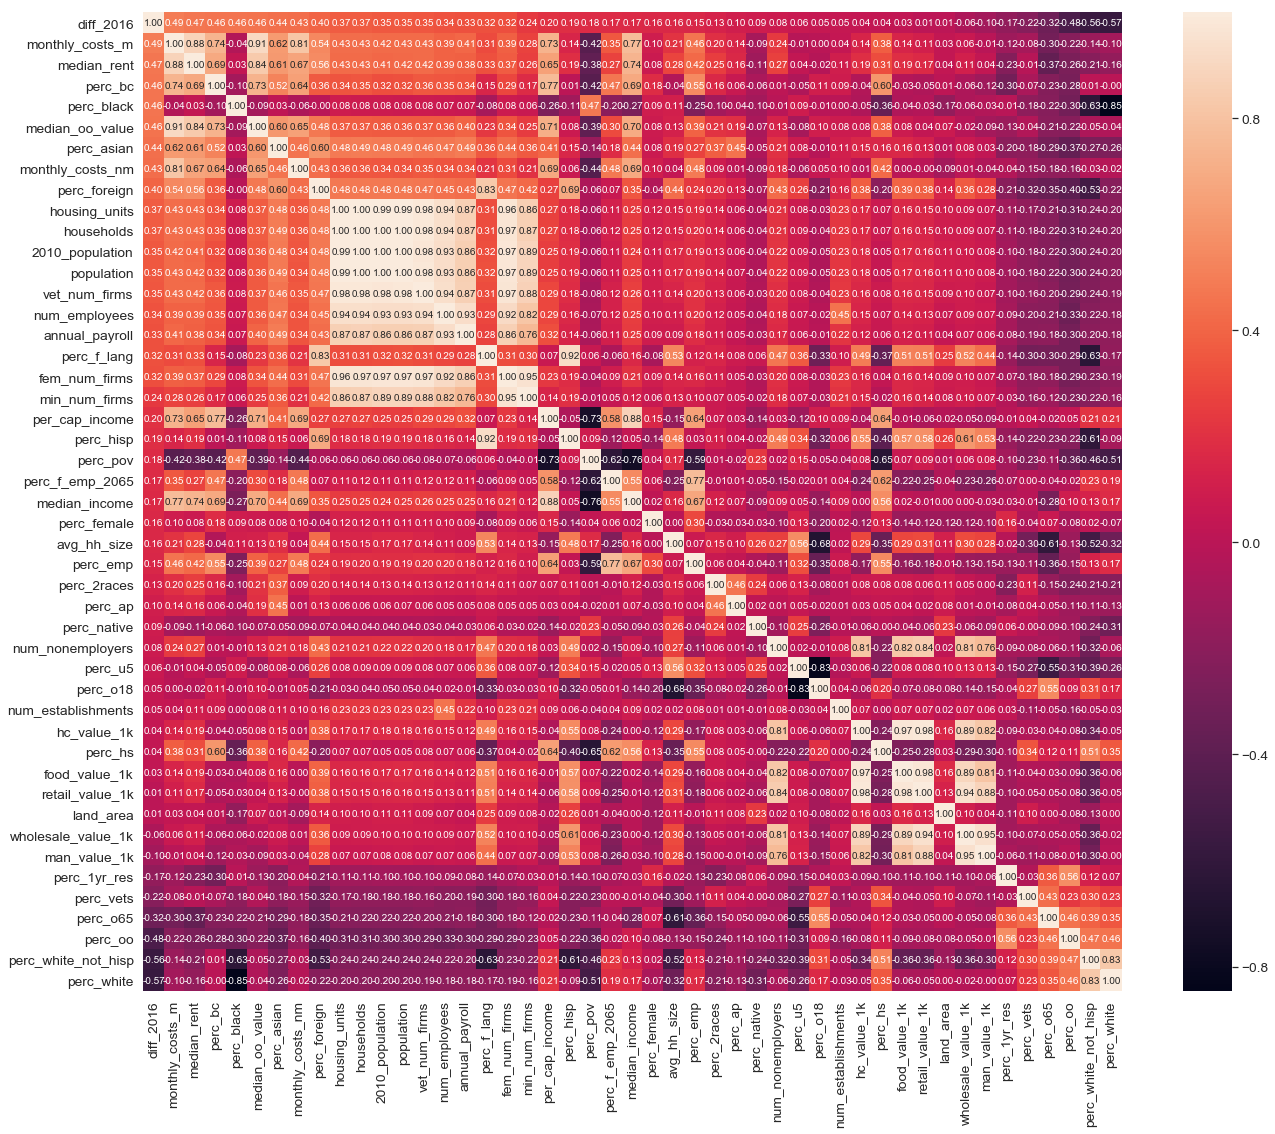

In [9]:
#correlation matrix
corrmat = df_2016.corr()
k = 50 #number of variables for heatmap
cols = corrmat.nlargest(k, 'diff_2016')['diff_2016'].index
cm = np.corrcoef(df_2016[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(22, 18))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [10]:
for c in df_2012.describe().columns[1:]:
    df_2012[c] = np.log(1+df_2012[c])

for c in df_2016.describe().columns[1:]:
    df_2016[c] = np.log(1+df_2016[c])

In [11]:
df_2016.describe()

diff_2016  2010_population    land_area   population  perc_female  \
count  3111.000000      3111.000000  3111.000000  3111.000000  3111.000000   
mean     -0.319436        10.281890     6.470575    10.284676     3.930336   
std       0.308229         1.455891     0.856533     1.467653     0.050597   
min      -0.916364         4.418841     1.098612     4.770685     3.325036   
25%      -0.546912         9.333443     6.066375     9.324205     3.921973   
50%      -0.382228        10.168809     6.416618    10.166352     3.941582   
75%      -0.149127        11.113902     6.819465    11.126549     3.953165   
max       0.887245        16.099796     9.906380    16.121927     4.100989   

           perc_u5     perc_o18     perc_o65  perc_2races   perc_white  \
count  3111.000000  3111.000000  3111.000000  3111.000000  3111.000000   
mean      1.920114     4.359475     2.872693     1.052565     4.414938   
std       0.179476     0.043738     0.240473     0.423368     0.253871   
min       0.000000     4.105944     1.458615     0.000000     2.415914   
25%       1.824549     4.337291     2.734368     0.788457     4.363735   
50%       1.931521     4.360548     2.879198     1.029619     4.513055   
75%       2.014903     4.385770     3.025291     1.280934     4.569543   
max       2.760010     4.563306     3.949319     3.387774     4.615121   

        perc_black  perc_native   perc_asian      perc_ap    perc_hisp  \
count  3111.000000  3111.000000  3111.000000  3111.000000  3111.000000   
mean      1.514085     0.499954     0.585063     0.054259     1.759414   
std       1.209698     0.653863     0.547866     0.149442     0.938577   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.470004     0.182322     0.182322     0.000000     1.064711   
50%       1.163151     0.262364     0.405465     0.000000     1.547563   
75%       2.442347     0.587787     0.788457     0.095310     2.307560   
max       4.464758     4.453184     3.775057     2.631889     4.602166   

       perc_white_not_hisp    perc_vets  perc_foreign  housing_units  \
count          3111.000000  3111.000000   3111.000000    3111.000000   
mean              4.316595     2.352972      1.401085       9.533274   
std               0.354168     0.251778      0.750278       1.390127   
min               0.641854     0.000000      0.000000       4.304065   
25%               4.203199     2.230014      0.824635       8.619118   
50%               4.452019     2.360854      1.271103       9.431001   
75%               4.547541     2.493205      1.894707      10.335574   
max               4.613138     3.328627      3.963737      15.061600   

           perc_oo  median_oo_value  monthly_costs_m  monthly_costs_nm  \
count  3111.000000      3111.000000      3111.000000       3111.000000   
mean      4.276809        11.685768         7.017528          5.961113   
std       0.123557         0.444792         0.295034          0.229456   
min       2.995732        10.382853         0.000000          5.170484   
25%       4.228293        11.365017         6.860664          5.814131   
50%       4.301359        11.621789         6.978214          5.940171   
75%       4.356067        11.951509         7.130899          6.074195   
max       4.539030        13.712925         8.098643          7.217443   

       median_rent   households  avg_hh_size  perc_1yr_res  perc_f_lang  \
count  3111.000000  3111.000000  3111.000000   3111.000000  3111.000000   
mean      6.518652     9.325419     1.257955      4.470042     1.935316   
std       0.241402     1.447095     0.068177      0.051911     0.826762   
min       5.620401     3.828641     1.040277      3.899950     0.000000   
25%       6.361302     8.369041     1.214913      4.445001     1.335001   
50%       6.480045     9.204322     1.252763      4.477337     1.791759   
75%       6.647039    10.164060     1.291984      4.503137     2.433613   
max       7.510978    14.998179     1.603420      4.6151

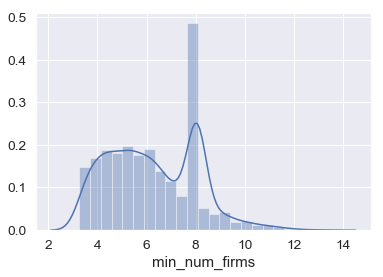

In [12]:
sns.distplot(df_2012['min_num_firms']);

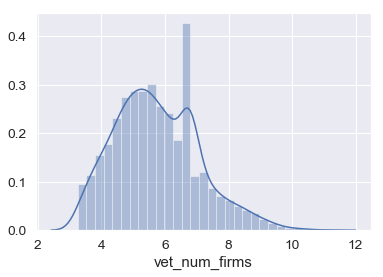

In [13]:
sns.distplot(df_2012['vet_num_firms']);

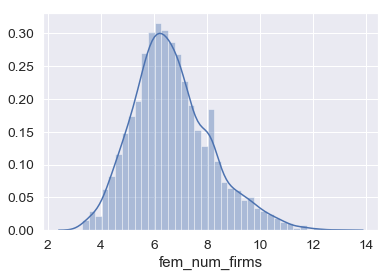

In [14]:
sns.distplot(df_2012['fem_num_firms']);

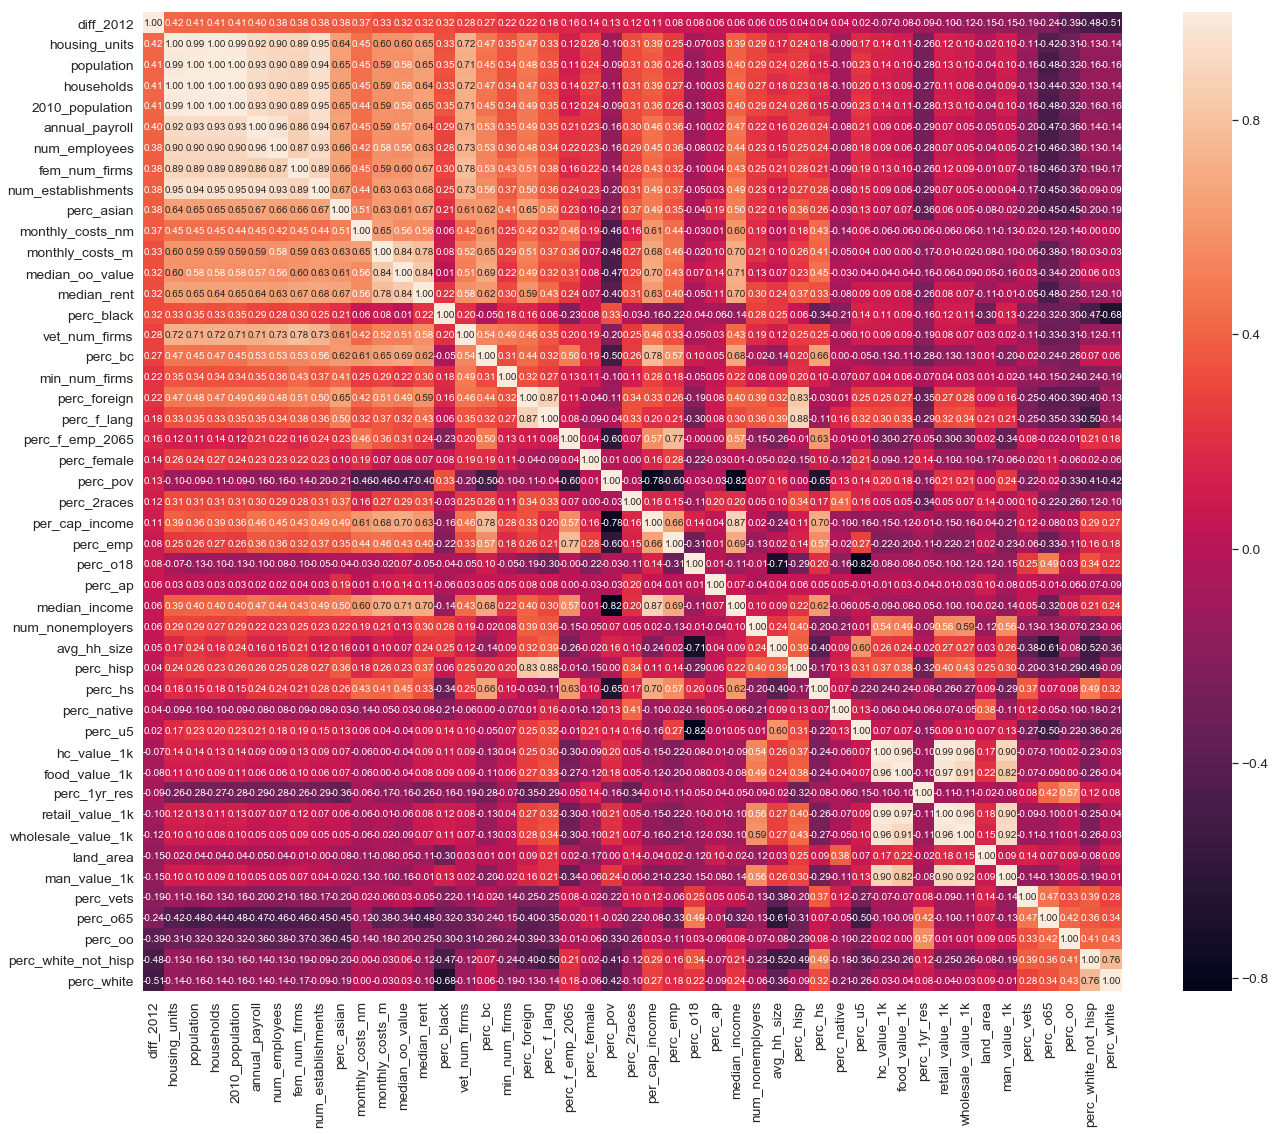

In [15]:
#correlation matrix
corrmat = df_2012.corr()
k = 50 #number of variables for heatmap
cols = corrmat.nlargest(k, 'diff_2012')['diff_2012'].index
cm = np.corrcoef(df_2012[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(22, 18))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

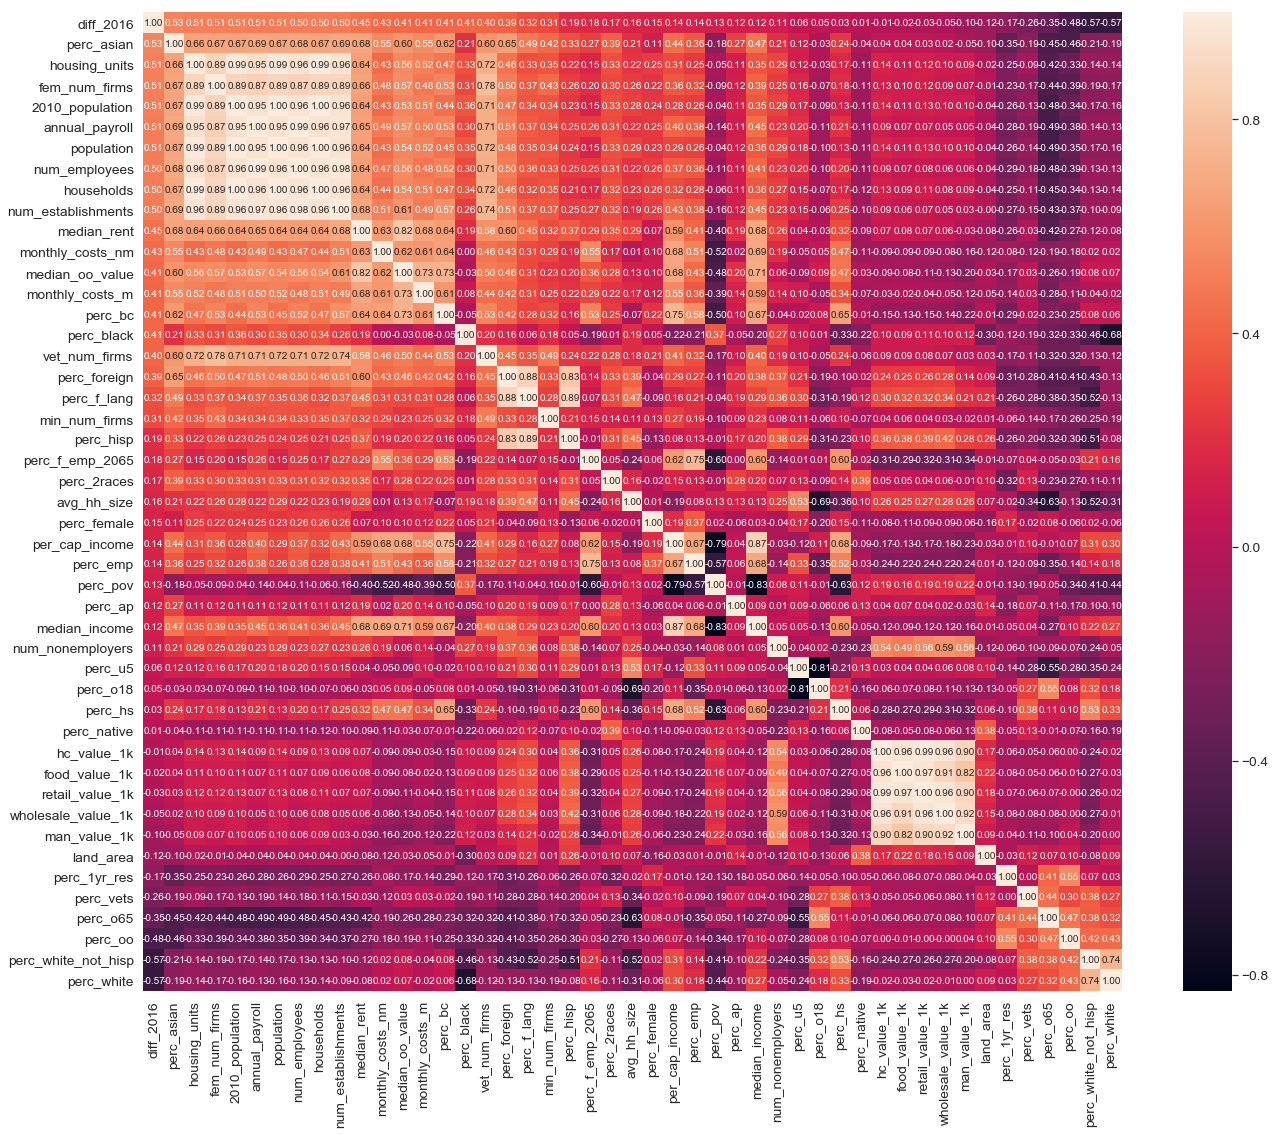

In [16]:
#correlation matrix
corrmat = df_2016.corr()
k = 50 #number of variables for heatmap
cols = corrmat.nlargest(k, 'diff_2016')['diff_2016'].index
cm = np.corrcoef(df_2016[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(22, 18))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_2012[df_2012.describe().columns[1:]] = scaler.fit_transform(df_2012[df_2012.describe().columns[1:]])



In [22]:
df_2016[df_2016.describe().columns[1:]] = scaler.fit_transform(df_2016[df_2016.describe().columns[1:]])



In [24]:
df_2016.describe()

#df_2012 = df_2012.drop(columns = ['households'])

diff_2016  2010_population    land_area   population  perc_female  \
count  3111.000000      3111.000000  3111.000000  3111.000000  3111.000000   
mean     -0.319436         0.501932     0.609912     0.485761     0.780073   
std       0.308229         0.124638     0.097247     0.129294     0.065206   
min      -0.916364         0.000000     0.000000     0.000000     0.000000   
25%      -0.546912         0.420736     0.564021     0.401147     0.769296   
50%      -0.382228         0.492252     0.603786     0.475337     0.794566   
75%      -0.149127         0.573160     0.649524     0.559927     0.809493   
max       0.887245         1.000000     1.000000     1.000000     1.000000   

           perc_u5     perc_o18     perc_o65  perc_2races   perc_white  \
count  3111.000000  3111.000000  3111.000000  3111.000000  3111.000000   
mean      0.695691     0.554333     0.567742     0.310695     0.908975   
std       0.065027     0.095631     0.096548     0.124969     0.115437   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.661066     0.505829     0.512206     0.232736     0.885693   
50%       0.699824     0.556679     0.570354     0.303922     0.953590   
75%       0.730035     0.611826     0.629009     0.378105     0.979275   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

        perc_black  perc_native   perc_asian      perc_ap    perc_hisp  \
count  3111.000000  3111.000000  3111.000000  3111.000000  3111.000000   
mean      0.339119     0.112269     0.154981     0.020616     0.382301   
std       0.270944     0.146831     0.145128     0.056781     0.203943   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.105270     0.040942     0.048296     0.000000     0.231350   
50%       0.260518     0.058916     0.107406     0.000000     0.336268   
75%       0.547028     0.131992     0.208860     0.036214     0.501407   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       perc_white_not_hisp    perc_vets  perc_foreign  housing_units  \
count          3111.000000  3111.000000   3111.000000    3111.000000   
mean              0.925328     0.706890      0.353476       0.486097   
std               0.089182     0.075640      0.189285       0.129224   
min               0.000000     0.000000      0.000000       0.000000   
25%               0.896774     0.669950      0.208045       0.401119   
50%               0.959429     0.709258      0.320683       0.476590   
75%               0.983482     0.749019      0.478010       0.560678   
max               1.000000     1.000000      1.000000       1.000000   

           perc_oo  median_oo_value  monthly_costs_m  monthly_costs_nm  \
count  3111.000000      3111.000000      3111.000000       3111.000000   
mean      0.830090         0.391257         0.866507          0.386245   
std       0.080060         0.133568         0.036430          0.112096   
min       0.000000         0.000000         0.000000          0.000000   
25%       0.798653         0.294938         0.847137          0.314440   
50%       0.845998         0.372045         0.861652          0.376015   
75%       0.881447         0.471058         0.880505          0.441490   
max       1.000000         1.000000         1.000000          1.000000   

       median_rent   households  avg_hh_size  perc_1yr_res  perc_f_lang  \
count  3111.000000  3111.000000  3111.000000   3111.000000  3111.000000   
mean      0.475120     0.492122     0.386541      0.797141     0.422951   
std       0.127687     0.129557     0.121065      0.072585     0.180684   
min       0.000000     0.000000     0.000000      0.000000     0.000000   
25%       0.391892     0.406498     0.310109      0.762128     0.291756   
50%       0.454699     0.481281     0.377322      0.807341     0.391578   
75%       0.543029     0.567205     0.446968      0.843418     0.531851   
max       1.000000     1.000000     1.000000      1.0000

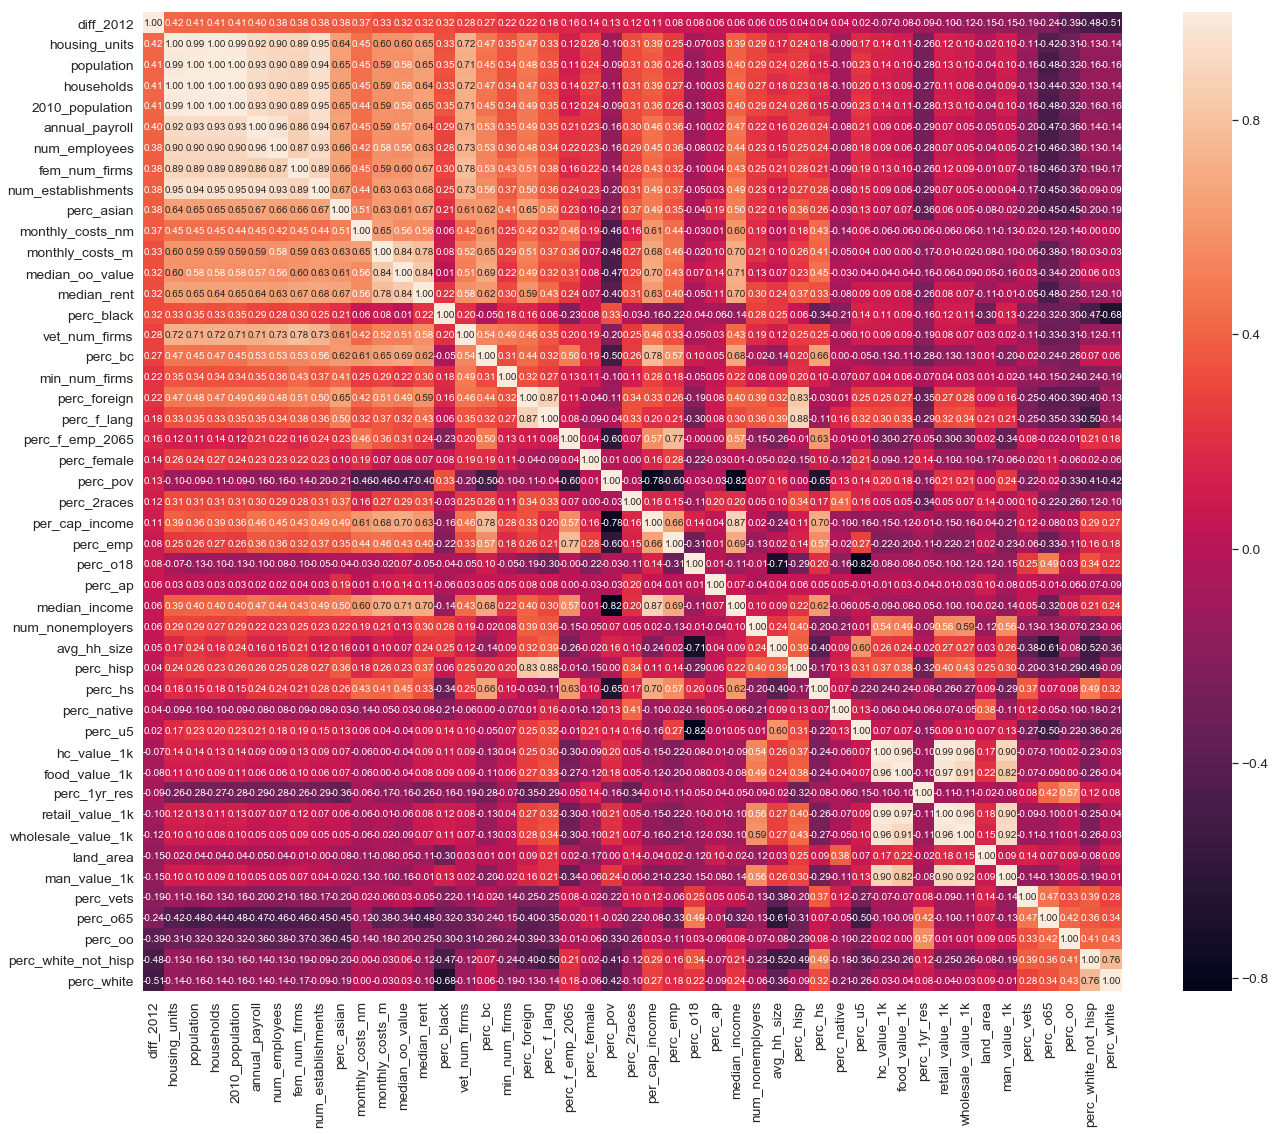

In [25]:
#correlation matrix
corrmat = df_2012.corr()
k = 50 #number of variables for heatmap
cols = corrmat.nlargest(k, 'diff_2012')['diff_2012'].index
cm = np.corrcoef(df_2012[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(22, 18))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

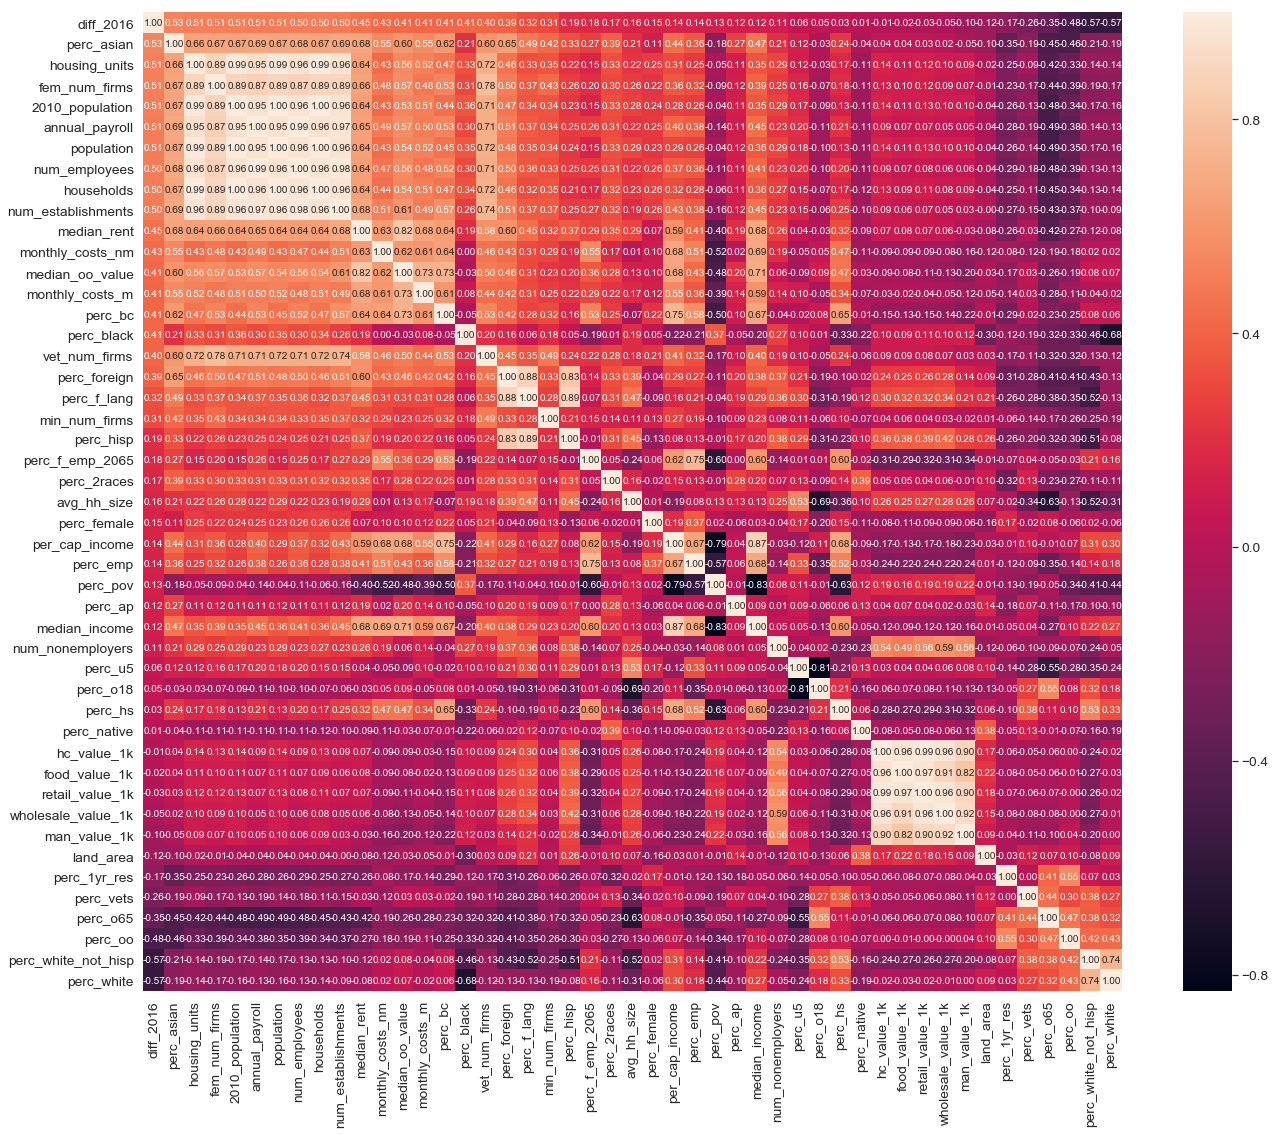

In [27]:
#correlation matrix
corrmat = df_2016.corr()
k = 50 #number of variables for heatmap
cols = corrmat.nlargest(k, 'diff_2016')['diff_2016'].index
cm = np.corrcoef(df_2016[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(22, 18))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
df_2016 = df_2016.drop(columns = ['households', 'housing_units','2010_population'])
df_2012 = df_2012.drop(columns = ['households', 'housing_units','2010_population'])

In [30]:
df_2016 = df_2016.drop(columns = ['num_employees'])
df_2012 = df_2012.drop(columns = ['num_employees'])

In [31]:
df_2016 = df_2016.drop(columns = ['retail_value_1k'])
df_2012 = df_2012.drop(columns = ['retail_value_1k'])

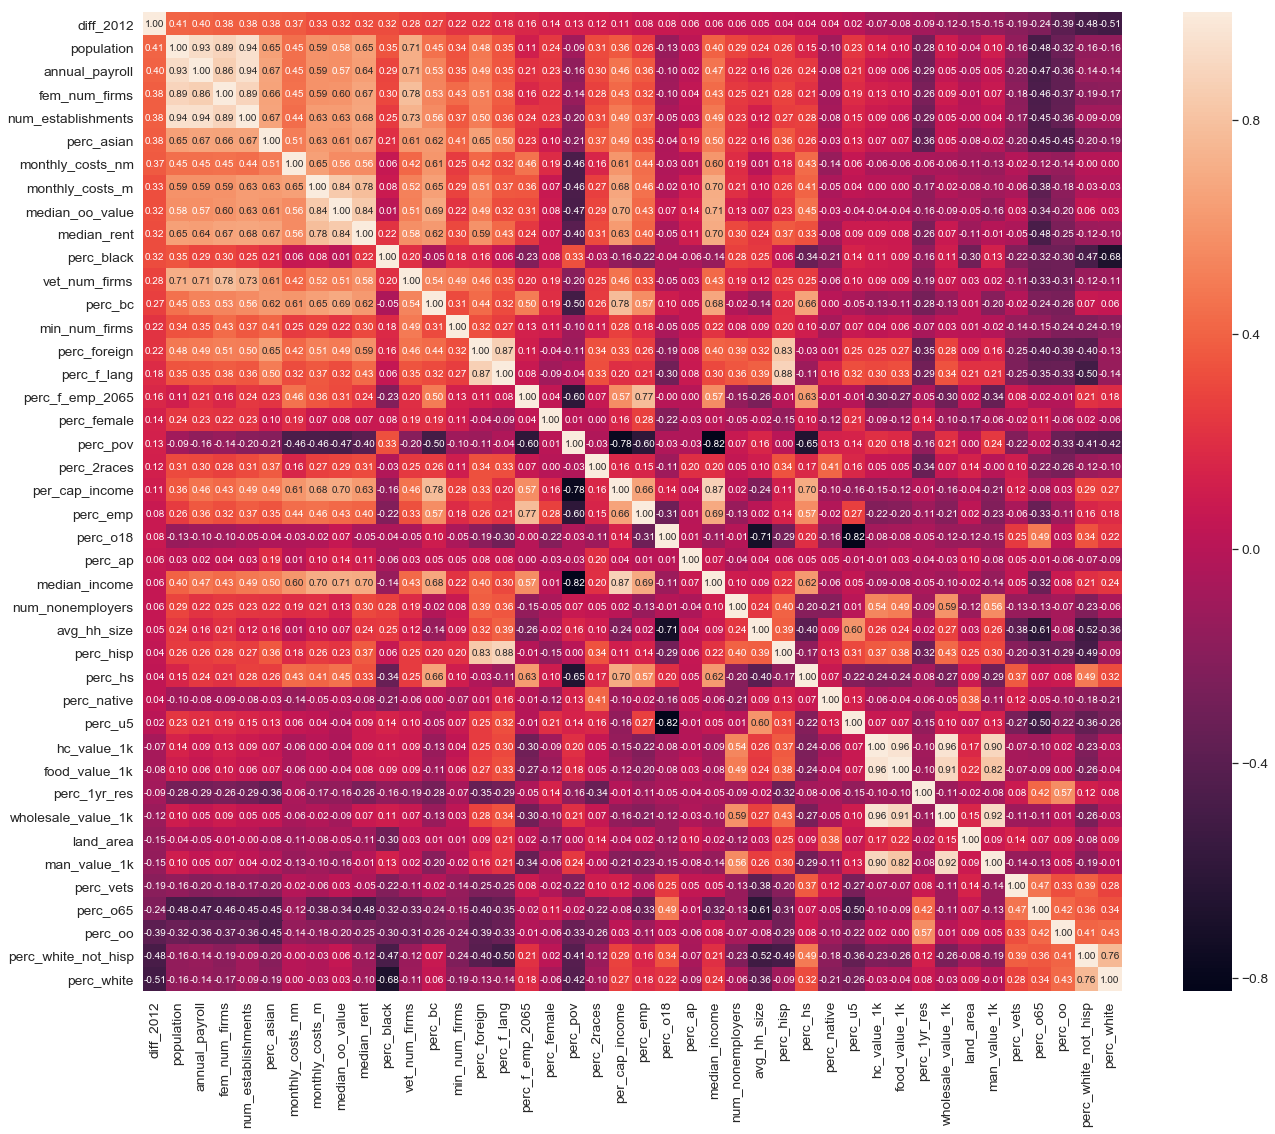

In [32]:
#correlation matrix
corrmat = df_2012.corr()
k = 50 #number of variables for heatmap
cols = corrmat.nlargest(k, 'diff_2012')['diff_2012'].index
cm = np.corrcoef(df_2012[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(22, 18))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

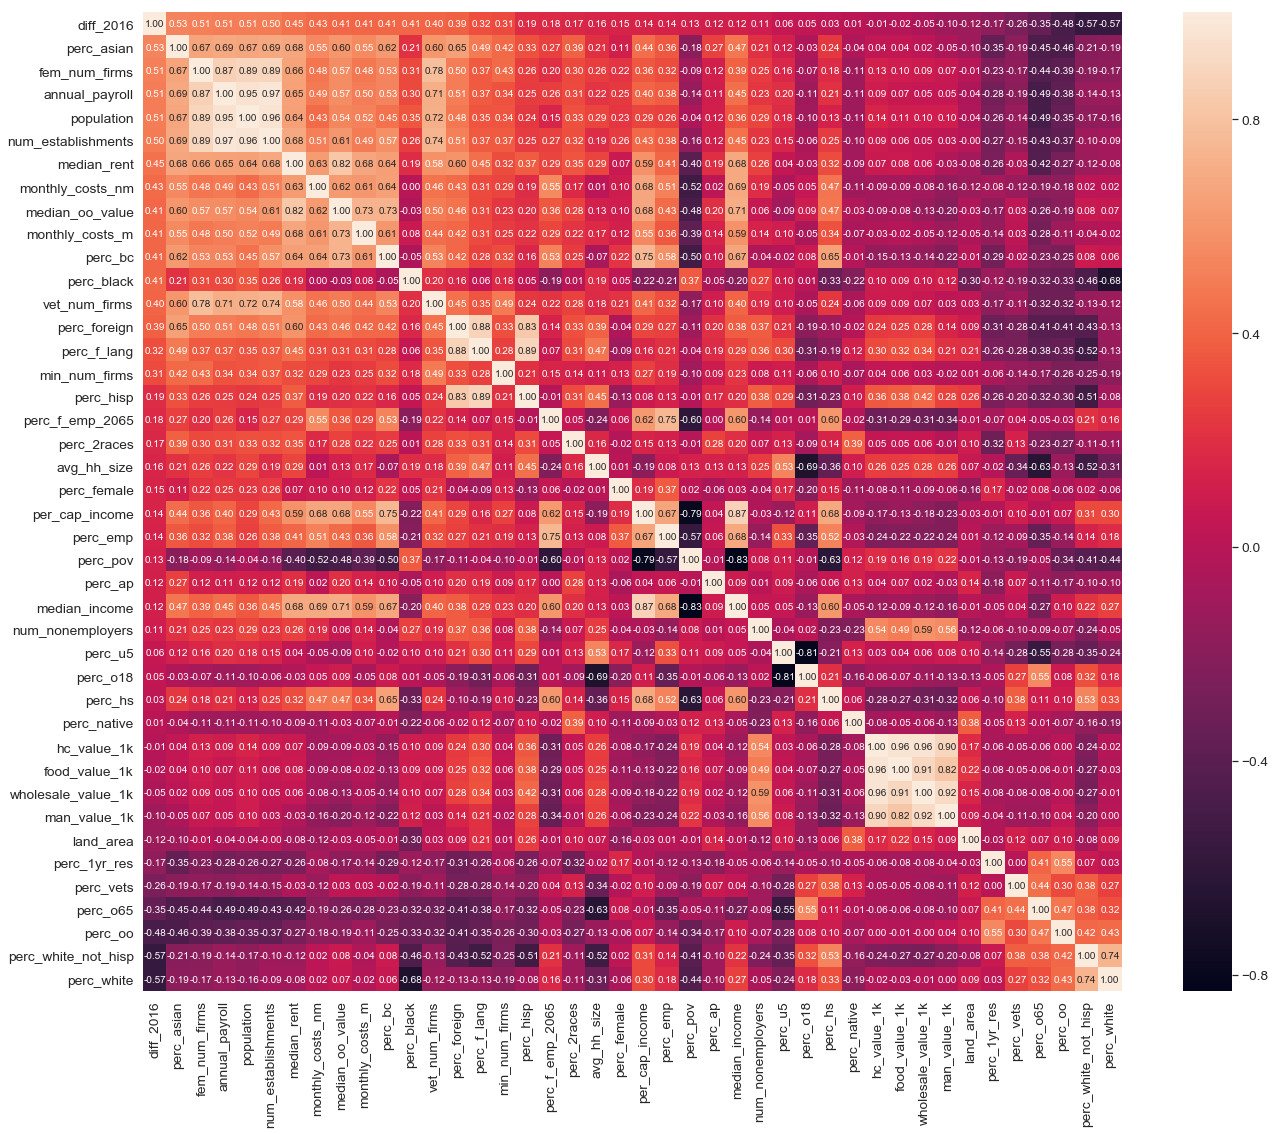

In [33]:
#correlation matrix
corrmat = df_2016.corr()
k = 50 #number of variables for heatmap
cols = corrmat.nlargest(k, 'diff_2016')['diff_2016'].index
cm = np.corrcoef(df_2016[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(22, 18))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [34]:
from sklearn.model_selection import train_test_split

rand = 31

df_2012_train, df_2012_test = train_test_split(df_2012, test_size=0.2, random_state=rand)
df_2016_train, df_2016_test = train_test_split(df_2016, test_size=0.2, random_state=rand)

In [36]:
len(df_2012_train)

2488

In [37]:
len(df_2016_train)

2488

In [38]:
df_2012_test.head()

state_abbreviation      county_name  diff_2012  land_area  population  \
fips                                                                          
36099                 NY    Seneca County   0.092279   0.531840    0.529443   
37011                 NC     Avery County  -0.502416   0.501282    0.472359   
8067                  CO  La Plata County   0.088112   0.719330    0.559914   
56029                 WY      Park County  -0.573213   0.879552    0.509850   
45067                 SC    Marion County   0.298253   0.578610    0.524638   

       perc_female   perc_u5  perc_o18  perc_o65  perc_2races  perc_white  \
fips                                                                        
36099     0.801823  0.718974  0.536472  0.741180     0.294071    0.965418   
37011     0.733832  0.635397  0.642668  0.771913     0.596551    0.931302   
8067      0.828457  0.713158  0.565368  0.668562     0.344373    0.936103   
56029     0.845103  0.718974  0.546153  0.770458     0.282898    0.983509   
45067     0.931656  0.777706  0.472336  0.726098     0.174026    0.595238   

       perc_black  perc_native  perc_asian   perc_ap  perc_hisp  \
fips                                                              
36099    0.377908     0.075265    0.106206  0.000000   0.290271   
37011    0.369451     0.143576    0.153963  0.117651   0.358470   
8067     0.105324     0.444665    0.138991  0.042740   0.552624   
56029    0.040857     0.176369    0.047757  0.042740   0.382213   
45067    0.907192     0.021320    0.068723  0.000000   0.272390   

       perc_white_not_hisp  perc_vets  perc_foreign   perc_oo  \
fips                                                            
36099             0.974171   0.743001      0.252939  0.856111   
37011             0.953777   0.724805      0.386665  0.824836   
8067              0.942958   0.716347      0.367293  0.800614   
56029             0.980164   0.793605      0.272391  0.817477   
45067             0.763562   0.701786      0.324574  0.780386   

       median_oo_value  monthly_costs_m  monthly_costs_nm  median_rent  \
fips                                                                     
36099         0.294718         0.868009          0.896897     0.455915   
37011         0.463467         0.851069          0.818163     0.481981   
8067          0.686551         0.910149          0.855943     0.650552   
56029         0.532272         0.878671          0.858656     0.459831   
45067         0.268920         0.831691          0.842850     0.337300   

       avg_hh_size  perc_1yr_res  perc_f_lang   perc_hs   perc_bc  perc_emp  \
fips                                                                          
36099     0.371480      0.768024     0.440543  0.771242  0.496421  0.580247   
37011     0.255323      0.736175     0.422312  0.747044  0.515543  0.503030   
8067      0.333692      0.673799     0.522285  0.935086  0.790753  0.736446   
56029     0.309613      0.708789     0.356221  0.920860  0.653157  0.704911   
45067     0.509999      0.868801     0.318915  0.725715  0.366696  0.569054   

       perc_f_emp_2065  num_nonemployers  man_value_1k  wholesale_value_1k  \
fips                                                                         
36099         0.755380          0.875354      0.497100            0.367143   
37011         0.666967          0.644891      0.676048            0.473424   
8067          0.801830          0.545273      0.659113            0.598861   
56029         0.804581          0.050649      0.459427            0.101052   
45067         0.594269          0.469486      0.746581            0.476757   

       hc_value_1k  food_value_1k  median_income  per_cap_income  perc_pov  \
fips                                                                         
36099     0.115225       0.065993       0.488765        0.452665  0.651701   
37011     0.315196       0.167966       0.369172        0.488717  0.756340   
8067      0.506863       0.532785       0.590348      

In [39]:
#df_2012_train.to_csv('df_2012_train.csv', index = True)
#df_2016_train.to_csv('df_2016_train.csv', index = True)
#df_2012_test.to_csv('df_2012_test.csv', index = True)
#df_2016_test.to_csv('df_2016_test.csv', index = True)